In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [3]:
X1, y1 = make_gaussian_quantiles(cov=2.    , n_samples=200, n_features=2 ,n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3,3), n_samples=300, n_features=2 ,n_classes=2, random_state=1, cov=1.5)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

In [4]:
model = AdaBoostClassifier( n_estimators=100 ,algorithm="SAMME" )

In [5]:
model.fit(X, y)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=100, random_state=None)

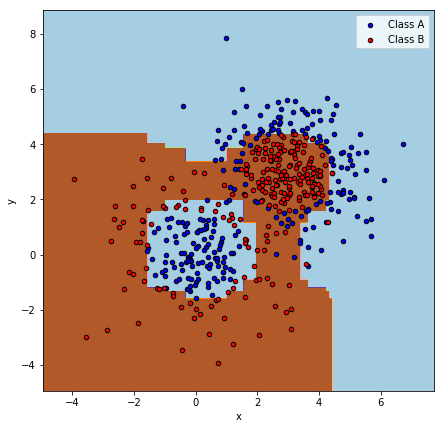

In [6]:
plt.figure(figsize=(7, 7))
x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

for i, n, c in zip(range(2), "AB", "br"):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, cmap=plt.cm.Paired, s=20, edgecolor='k',label="Class %s" % n)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y');